In [1]:
import numpy as np
import constants as c
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [1]:
AU = 1.49598e+13 

In [2]:
mp = 1.6726219e-24 #proton mass in g

rho_s = 1.4 #g/cm3
a = 0.1
m_dust = rho_s*(4.*np.pi/3.)*a**3.

dtg = 0.01
sigma0 = 2000. #g/cm2
T0 = 280. #K

h0 = np.sqrt((c.kB*T0)/(c.G*c.Mstar*c.mg))*(c.AU)**(3./2.)
q = -1./2.
ps = -3./2.
p = ps-0.5*(3.+q)
rho0 = sigma0/(h0*np.sqrt(2.*np.pi))
print(rho0)


1.5958029453488698e-09


In [3]:
def rhog(r,z):
    rho_g = 0.0
    hg = 0.0
    hg = h0*(r/c.AU)**(0.5*(3.+q))
    if (np.sqrt(r**2.+z**2.)<(0.1*c.AU)):
        rho_g = 0.0
    elif (r<0.1*c.AU):
        rho_g = 0.0
    else:
        rho_g = rho0*(r/c.AU)**p*np.exp(-z**2./(2.*hg**2))
    return rho_g

In [4]:
### X-Grid
x_min = 0.0*c.AU
x_max = 10.0*c.AU
N_x = 200
dx = (x_max-x_min)/N_x
x_grid = np.linspace(x_min,x_max,N_x)

#Y-Grid
y_min = 0.0
y_max = 0.0
N_y = 1
y_grid = np.linspace(y_min,y_max,N_y )

#Z-Grid
z_max = 0.8*c.AU
z_min = -z_max
N_z = int((z_max-z_min)/dx)
print(N_z)
N_z = 33
z_grid = np.linspace(z_min,z_max,N_z)


32


In [5]:
rho_plot = np.zeros((N_x,N_z))

In [6]:
N0 = N_x*N_y*N_z
data = np.zeros((N0,4))
dust_data = np.zeros((N0,4))
print(data.shape)

for i,x in enumerate(x_grid):
    for j,y in enumerate (y_grid):
        for k,z in enumerate (z_grid):
            m = k+(j*(N_z-1))+(i*(N_z+N_y-1))
            data[m,0] = x
            data[m,1] = y
            data[m,2] = z
            data[m,3] = rhog(x,z)/mp
            
            dust_data[m,0] = x
            dust_data[m,1] = y
            dust_data[m,2] = z
            dust_data[m,3] = dtg*rhog(x,z)/m_dust
            
            rho_plot[i,k] = rhog(x,z)   

(6600, 4)


(200, 33)
(200, 33)


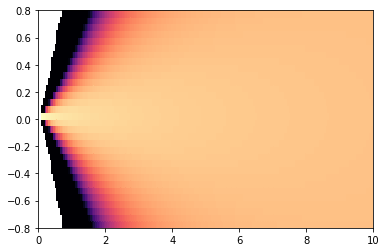

In [7]:
print(rho_plot.shape)
z_plot,x_plot = np.meshgrid(z_grid, x_grid)
print(x_plot.shape)

plt.figure()
plt.pcolormesh(x_plot/c.AU, z_plot/c.AU, rho_plot,norm=colors.LogNorm(vmin=1.0e-50, vmax=np.max(rho_plot)), cmap='magma')
plt.show()

In [8]:
print(data)

[[ 0.00000000e+00  0.00000000e+00 -1.19678400e+13  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.12198500e+13  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.04718600e+13  0.00000000e+00]
 ...
 [ 1.49598000e+14  0.00000000e+00  1.04718600e+13  8.47937542e+11]
 [ 1.49598000e+14  0.00000000e+00  1.12198500e+13  7.65236983e+11]
 [ 1.49598000e+14  0.00000000e+00  1.19678400e+13  6.85731956e+11]]


In [9]:
np.savetxt('2D_Hdensity.txt', data, delimiter=' ')
np.savetxt('2D_dust_density.txt', dust_data, delimiter=' ')

In [10]:
print(dust_data)

[[ 0.00000000e+00  0.00000000e+00 -1.19678400e+13  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.12198500e+13  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.04718600e+13  0.00000000e+00]
 ...
 [ 1.49598000e+14  0.00000000e+00  1.04718600e+13  2.41849391e-12]
 [ 1.49598000e+14  0.00000000e+00  1.12198500e+13  2.18261474e-12]
 [ 1.49598000e+14  0.00000000e+00  1.19678400e+13  1.95584990e-12]]


In [11]:
print(data)

[[ 0.00000000e+00  0.00000000e+00 -1.19678400e+13  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.12198500e+13  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.04718600e+13  0.00000000e+00]
 ...
 [ 1.49598000e+14  0.00000000e+00  1.04718600e+13  8.47937542e+11]
 [ 1.49598000e+14  0.00000000e+00  1.12198500e+13  7.65236983e+11]
 [ 1.49598000e+14  0.00000000e+00  1.19678400e+13  6.85731956e+11]]


In [12]:
print(np.max(dust_data[:,3])*m_dust)
print(np.max(data[:,3])*mp)

8.851008021862864e-09
8.851008021862863e-07
